We'll continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.


Each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

* Economy (GDP per Capita)
* Family
* Health (Life Expectancy)
* Freedom
* Trust (Government Corruption)
* Generosity

We'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

Which of the factors above contribute the most to the happiness score?

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

* Series.map()
* Series.apply()
* DataFrame.applymap()
* DataFrame.apply()
* pd.melt()

Below are descriptions for some of the other columns we'll work with in this mission:

* Country - Name of the country
* Region - Name of the region the country belongs to
* Happiness Rank - The rank of the country, as determined by its happiness score
* Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
* Dystopia Residual- Represents the extent to which the factors above over or under explain the happiness score. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# happiness2015 = pd.read_csv("World_Happiness_2015.csv", index_col = 1)
# happiness2015.index.name = None
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015.rename(mapping, inplace=True, axis = 1)
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
happiness2015[["Economy","Family","Health","Freedom","Trust","Generosity"]].head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


notice that each of the "factor" columns consists of numbers:

It can be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact using the following function:

In [6]:
def label(element):
    if element >1:
        return "High"
    return "Low"

Pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:

1. Series.map() method
2. Series.apply() method

Both methods above apply a function element-wise to a column.

Because we're using the function as a parameter, we pass it into the function without the parentheses.

In [7]:
# Using Series.map() method to apply the label function to the Economy column in happiness2015
economy_impact_map = happiness2015.Economy.map(label)
economy_impact_apply = happiness2015["Economy"].apply(label)

# checking if both methods produce the same result
# economy_impact_map == economy_impact_apply.  It will give element wise True or False
economy_impact_map.equals(economy_impact_apply) # it will check if all element are equal to each other

True

We applied a function to the Economy column using the Series.map() and Series.apply() methods and confirmed that both methods produce the same results.

In [8]:
# Update label to take in another argument named x

def label(element, x):
    if element > x:
        return "High"
    return "Low"


In [9]:
economy_impact_apply = happiness2015["Economy"].apply(label,x = 0.8) # we can use the Series.apply() method to apply a function with additional arguments element-wise

In [10]:
economy_impact_map = happiness2015.Economy.map(label, x = 0.8) # we can not use the Series.apply() method to apply a function with additional arguments element-wise

TypeError: map() got an unexpected keyword argument 'x'

So far, we've transformed just one column at a time. If we want to transform more than one column, we could use the Series.map() or Series.apply() method to transform them individually on each column

Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap() method

In [11]:
def label(element):
    if element > 1:
        return "High"
    return "Low"

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact.head(5)

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


We can see from the results that, according to our definition, the Economy and Family columns had a high impact on the happiness scores of the first five countries.

We can also use the apply() method on a dataframe, but the DataFrame.apply() method has different capabilities. Instead of applying functions element-wise, the df.apply() method applies functions along an axis, either column-wise or row-wise

In [12]:
from collections import Counter
factors_impact.apply(Counter, axis = 1).head(5) # function applied on each row

0    {'High': 2, 'Low': 4}
1    {'High': 2, 'Low': 4}
2    {'High': 2, 'Low': 4}
3    {'High': 2, 'Low': 4}
4    {'High': 2, 'Low': 4}
dtype: object

In [13]:
# calculate the number of 'High' and 'Low' values in each column factors_impact

factors_impact.apply(pd.value_counts) # by default axis = 0

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Now, we can easily see that the Family and Economy columns contain the most 'High' values!

If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error

In [14]:
# Creating a function that calculates the percentage of 'High' and 'Low' values in each column.

def v_count(col):
    num = col.value_counts()
    deno = col.size  # it will calculate the total number of rows in all columns
    return num/deno

v_counts_pct = factors_impact.apply(v_count, axis = 0) # by default axis is 0
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In general, we should only use the df.apply() method when a vectorized function does not exist.

In [15]:
factors_impact[["Economy", "Family"]].size

316

In [16]:
factors_impact[["Economy", "Family"]].count()

Economy    158
Family     158
dtype: int64

One thing you probably didn't notice about the factor columns is that the sum of the six factors and the Dystopia Residual column equals the happiness score:

In [17]:
#Calculate the sum of the factor columns in each row.
factors = ["Economy","Family","Health","Freedom","Trust","Generosity","Dystopia Residual"]
happiness2015['Factors Sum'] = happiness2015[factors].sum(axis = 1)
#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


The values we calculated in the Factors Sum column are slightly different than the values in the Happiness Score column, but the differences are so minor that we can attribute them to rounding. Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

Let's use the df.apply() method the convert each of the values in the six factor columns and the Dystopia Residual column to percentages.

In [18]:
# Create a function that converts each of the six factor columns and the Dystopia Residual column to percentages.

def percentages(col):
    per = col/happiness2015["Happiness Score"]*100
    return per
factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


# pd.melt() function.

If we reshape the dataframe so that one column holds the values for all columns. We can accomplish this with the pd.melt() function.

pd.melt(df, id_vars=[Name of the column(s) that should remain the same in the result], value_vars=[Name of the column(s) that should be changed to rows in the result])

In [23]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

# Using melt function to reshape happiness2015. 
#The columns listed in main_cols should stay the same.
#The columns listed in factors should be transformed into rows
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt.head(5)

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629


In [28]:
# Convert the value column to a percentage.

melt["Percentage"] = round(melt.value/melt["Happiness Score"]*100, ndigits = 2)
melt.Percentage.head()

0    18.41
1    17.22
2    17.61
3    19.40
4    17.86
Name: Percentage, dtype: float64

We may have noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as tidy data.

In [45]:
# Use the df.pivot_table() method to create a pivot table from the melt dataframe.
# Set the variable column as the index and the value column as the values.
pv_melt = melt.pivot_table(values = "value", index = "variable" ) # default aggfunc is np.mean or "mean"
pv_melt.sort_values(by = "value", ascending = False)

,value
variable,
Dystopia Residual,2.098977
Family,0.991046
Economy,0.846137
Health,0.630259
Freedom,0.428615
Generosity,0.237296
Trust,0.143422


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9CF749588>],
      dtype=object)

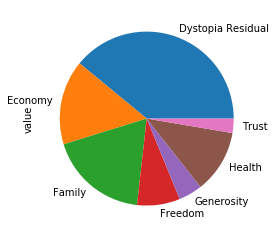

In [42]:
# creating pie plot
pv_melt.plot(kind = "pie",subplots = True, legend = False)

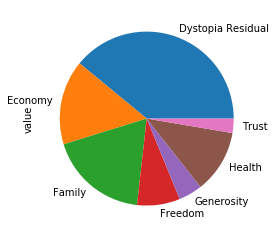

In [44]:
# 2nd Method
pv_melt.plot(kind = "pie", y = "value", legend = False)

As we explore pandas, we'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the df.pivot() method, not to be confused with the df.pivot_table() method used to aggregate data.